In [10]:
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
sys.path.append(r'C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis')

#local imports
from fishy import WorkingFish, VizStimFish

# import process
import stimuli

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


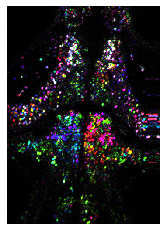

In [21]:
# base example -- 
testpath = r'D:\Data\Imaging\2022\extended_singleplanes\-130'

sharky = VizStimFish(folder_path = testpath, 
                    frametimes_key='img', 
                    stim_key='matt', 
                    stim_fxn=stimuli.pandastim_to_df,)

diff_image = sharky.make_difference_image()
plt.imshow(diff_image)
plt.axis('off')
plt.show()

In [3]:
# make dict of paths
paths = {}
with os.scandir(r'D:\Data\Imaging\2022\extended_singleplanes\4dpf\fish1') as entries:
    for entry in entries:
        if os.path.isdir(entry.path):
            print(entry.path)
            paths[entry.name] = entry.path         

In [4]:
# make central vol processing class      
fishvolume = VolumeFish()

In [6]:
planes = ['60um', '70um', '80um', '90um', '100um', '110um'] # the order i want them in my thing
for p in tqdm(planes):
    afish = WorkingFish(folder_path = paths[p], 
                        frametimes_key='ch1', 
                        stim_key='matt', 
                        stim_fxn=stimuli.pandastim_to_df) # make a fish
    
    
    fishvolume.add_volume(afish) # add them to volume

  0%|          | 0/6 [00:00<?, ?it/s]

C:\Soft_Kitty\Anaconda3\envs\caiman\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Soft_Kitty\Anaconda3\envs\caiman\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


  0%|          | 0/6 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


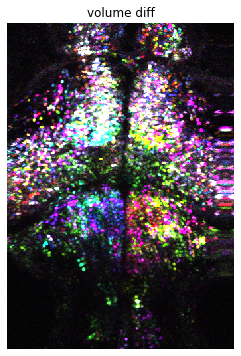

In [7]:
fishvolume.add_diff_imgs(brightnessFactor=10)

# process in the diff imgs
vdiff = fishvolume.volume_diff()

plt.figure(figsize=(6,6))
plt.imshow(vdiff)
plt.axis('off')
plt.title('volume diff')
plt.show()

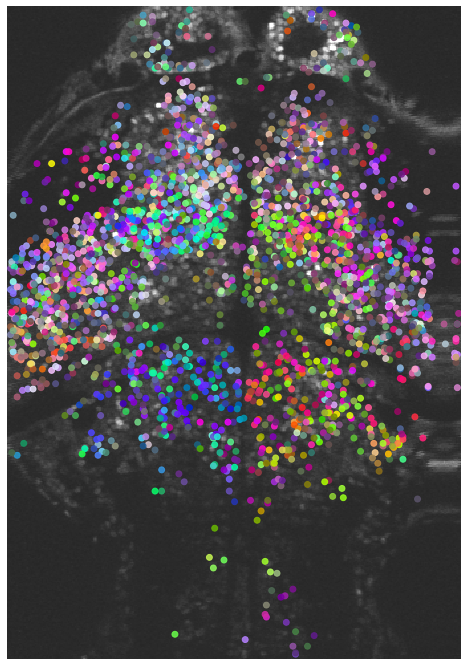

In [11]:
# do cool volume stuff
xpos, ypos, colors, neurons = fishvolume.volume_computed_image()

plt.figure(figsize=(12,12))
plt.scatter(xpos, ypos, color=colors, alpha=.85, s=35)
plt.gca().invert_yaxis()
plt.imshow(fishvolume[2].ops['refImg'], cmap='gray', alpha=0.85, vmax=np.percentile(fishvolume[2].ops['refImg'], 99.9)) 
plt.gca().invert_xaxis()
plt.axis('off')
plt.show()

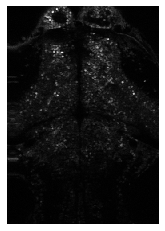

In [19]:
plt.imshow(fishvolume[2].ops['refImg'], cmap='gray') # can index into fishvolume!
plt.axis('off')
plt.show()

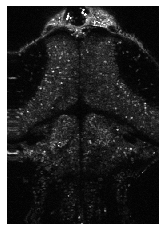

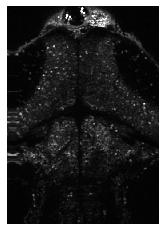

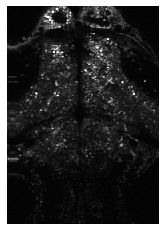

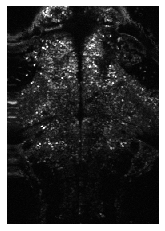

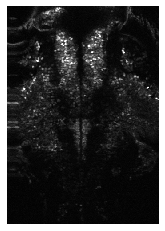

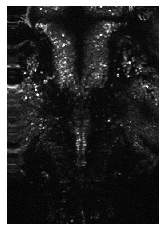

In [18]:
for vol in fishvolume:
    plt.imshow(vol.ops['refImg'], cmap='gray', vmax=np.percentile(vol.ops['refImg'], 99.9)) # can index into fishvolume!
    plt.axis('off')
    plt.show()

In [12]:
# we can iterate through these things!

for fish in fishvolume:
    print(fish.folder_path)

D:\Data\Imaging\2022\extended_singleplanes\4dpf\fish1\60um
D:\Data\Imaging\2022\extended_singleplanes\4dpf\fish1\70um
D:\Data\Imaging\2022\extended_singleplanes\4dpf\fish1\80um
D:\Data\Imaging\2022\extended_singleplanes\4dpf\fish1\90um
D:\Data\Imaging\2022\extended_singleplanes\4dpf\fish1\100um
D:\Data\Imaging\2022\extended_singleplanes\4dpf\fish1\110um


In [13]:
len(fishvolume)

6